In [203]:
import csv

In [202]:
pip import dill 

ERROR: unknown command "import"
Note: you may need to restart the kernel to use updated packages.


# Code for generating symmetric character table

In [ ]:

n = 7
partitions = list(Partitions(n))
num_partitions = len(partitions)

#rearranging partitions so that partitions[num_partitions - 1 - i].conjugate = partitions[i]
for i in range(num_partitions) : 
    partitions[i] = Partition(partitions[num_partitions - 1 - i]).conjugate()

m = matrix([[symmetrica.charvalue(irred, cls) for cls in partitions] for irred in partitions])

In [ ]:

m

In [94]:
latex(m)

\left(\begin{array}{rrrrrrrrrrrrrrrrrrrrrr}
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
-1 & 0 & -1 & -1 & -1 & 1 & 0 & 0 & -1 & -1 & 2 & 3 & -1 & 1 & 0 & 2 & 4 & -1 & 1 & 3 & 5 & 7 \\
0 & -1 & 1 & 0 & 0 & -1 & 0 & -1 & 2 & 1 & 0 & 2 & 1 & -1 & 1 & 1 & 5 & 4 & 2 & 4 & 10 & 20 \\
0 & 0 & -1 & 1 & 0 & -1 & 0 & 1 & -2 & 1 & -2 & -2 & 1 & 1 & 1 & 1 & 1 & -4 & 2 & 4 & 10 & 28 \\
0 & 0 & 0 & -1 & 2 & 0 & -1 & 1 & 2 & -2 & -1 & -2 & -2 & 2 & -1 & 1 & -1 & 6 & 0 & 2 & 4 & 14 \\
1 & 0 & 0 & 1 & 1 & 0 & -1 & 0 & -1 & 0 & 1 & 3 & 0 & 0 & -2 & 0 & 6 & -3 & -3 & 1 & 9 & 21 \\
0 & 1 & 0 & -1 & 0 & 0 & 1 & 0 & 0 & -2 & -1 & 0 & -2 & -2 & 0 & -2 & 4 & 0 & 0 & 0 & 16 & 64 \\
0 & 0 & 1 & 0 & -2 & 1 & 0 & -1 & 0 & 1 & 0 & -4 & 1 & 1 & -1 & 1 & -5 & -2 & -2 & 2 & 10 & 70 \\
0 & 0 & -1 & 1 & 0 & 1 & -1 & 0 & 0 & 1 & 1 & 0 & 1 & -1 & 0 & -2 & -4 & 8 & 4 & 0 & 4 & 56 \\
0 & 0 & 0 & -1 & 2 & 0 & 0 & 0 & 0 & 0 & 2 & 0 & 0 & 0 & 2 & 0 & -6 & -6 & 0 & 2 & 0 & 42 \\
-1

In [95]:
partitions

[[8],
 [7, 1],
 [6, 2],
 [5, 3],
 [4, 4],
 [6, 1, 1],
 [5, 2, 1],
 [4, 3, 1],
 [4, 2, 2],
 [3, 3, 2],
 [5, 1, 1, 1],
 [4, 1, 1, 1, 1],
 [3, 3, 2],
 [3, 3, 1, 1],
 [3, 2, 2, 1],
 [3, 2, 1, 1, 1],
 [3, 1, 1, 1, 1, 1],
 [2, 2, 2, 2],
 [2, 2, 2, 1, 1],
 [2, 2, 1, 1, 1, 1],
 [2, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1]]

In [96]:
col_header_string = str(partitions[0])
for i in range(1, num_partitions) : 
    col_header_string +=  ' & ' + str(partitions[i])
col_header_string

'[8] & [7, 1] & [6, 2] & [5, 3] & [4, 4] & [6, 1, 1] & [5, 2, 1] & [4, 3, 1] & [4, 2, 2] & [3, 3, 2] & [5, 1, 1, 1] & [4, 1, 1, 1, 1] & [3, 3, 2] & [3, 3, 1, 1] & [3, 2, 2, 1] & [3, 2, 1, 1, 1] & [3, 1, 1, 1, 1, 1] & [2, 2, 2, 2] & [2, 2, 2, 1, 1] & [2, 2, 1, 1, 1, 1] & [2, 1, 1, 1, 1, 1, 1] & [1, 1, 1, 1, 1, 1, 1, 1]'

# Code for finding the character tables mod 4


In [98]:
chartable_mod_4 = matrix(ZZ.quotient(4), m); chartable_mod_4.str()

'[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]\n[3 0 3 3 3 1 0 0 3 3 2 3 3 1 0 2 0 3 1 3 1 3]\n[0 3 1 0 0 3 0 3 2 1 0 2 1 3 1 1 1 0 2 0 2 0]\n[0 0 3 1 0 3 0 1 2 1 2 2 1 1 1 1 1 0 2 0 2 0]\n[0 0 0 3 2 0 3 1 2 2 3 2 2 2 3 1 3 2 0 2 0 2]\n[1 0 0 1 1 0 3 0 3 0 1 3 0 0 2 0 2 1 1 1 1 1]\n[0 1 0 3 0 0 1 0 0 2 3 0 2 2 0 2 0 0 0 0 0 0]\n[0 0 1 0 2 1 0 3 0 1 0 0 1 1 3 1 3 2 2 2 2 2]\n[0 0 3 1 0 1 3 0 0 1 1 0 1 3 0 2 0 0 0 0 0 0]\n[0 0 0 3 2 0 0 0 0 0 2 0 0 0 2 0 2 2 0 2 0 2]\n[3 0 0 0 3 0 0 1 1 2 0 1 2 2 1 3 1 3 1 3 1 3]\n[1 0 0 0 3 0 0 3 3 2 0 3 2 2 1 1 1 3 3 3 3 3]\n[0 0 0 3 2 0 0 0 0 0 2 0 0 0 2 0 2 2 0 2 0 2]\n[0 0 3 1 0 3 1 0 0 3 1 0 3 3 0 2 0 0 0 0 0 0]\n[0 0 1 0 2 3 0 1 0 3 0 0 3 1 3 3 3 2 2 2 2 2]\n[0 1 0 3 0 0 3 0 0 2 3 0 2 2 0 2 0 0 0 0 0 0]\n[3 0 0 1 1 0 1 0 1 0 1 1 0 0 2 0 2 1 3 1 3 1]\n[0 0 0 3 2 0 1 3 2 2 3 2 2 2 3 3 3 2 0 2 0 2]\n[0 0 3 1 0 1 0 3 2 3 2 2 3 1 1 3 1 0 2 0 2 0]\n[0 3 1 0 0 1 0 1 2 3 0 2 3 3 1 3 1 0 2 0 2 0]\n[1 0 3 3 3 3 0 0 1 1 2 1 1 1 0 2 0 3 3 3 3 3]\n[3 1 1 1 1 3

In [99]:
num_symm_groups = 27
# function that returns a character table for S_n whose rows are symmetric about the center, mod 4
def nth_symm_chartable(n) : 
    partitions = list(Partitions(n))
    num_partitions = len(partitions)

    for i in range(num_partitions) : 
        partitions[i] = Partition(partitions[num_partitions - 1 - i]).conjugate()

    return matrix(ZZ, [[symmetrica.charvalue(irred, cls) for cls in partitions] for irred in partitions])

char_table_list = []
for n in range(1, num_symm_groups) : 
    char_table_list.append(nth_symm_chartable(n))



In [234]:
# residue calculator returns the list of the numbers 
def residue_calculator(n, m) : 
  A = matrix(ZZ.quotient(m), char_table_list[n - 1]) 
  num_entries = len(A.columns())**2 
  residues_list = [0 for i in range(m)] 
  count = 0 
  for j in A : 
      for k in j : 
          residues_list[k] += 1
  for i in range(m) : 
    residues_list[i] = residues_list[i] / num_entries
  return residues_list 

proportions_list = []

# fills the residues list - each item of the list, from n = 1 to n = 15
for n in range(1, 25) : 
  single_prop_list = []
  for m in [4,5,6,7,8,9] :
#   for m in [4] :
    single_prop_list.append(residue_calculator(n, m))
  proportions_list.append(single_prop_list)


In [229]:
proportions_list

[[[0, 1, 0, 0],
  [0, 1, 0, 0, 0],
  [0, 1, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0]],
 [[0, 3/4, 0, 1/4],
  [0, 3/4, 0, 0, 1/4],
  [0, 3/4, 0, 0, 0, 1/4],
  [0, 3/4, 0, 0, 0, 0, 1/4],
  [0, 3/4, 0, 0, 0, 0, 0, 1/4]],
 [[1/9, 5/9, 1/9, 2/9],
  [1/9, 5/9, 1/9, 0, 2/9],
  [1/9, 5/9, 1/9, 0, 0, 2/9],
  [1/9, 5/9, 1/9, 0, 0, 0, 2/9],
  [1/9, 5/9, 1/9, 0, 0, 0, 0, 2/9]],
 [[4/25, 2/5, 2/25, 9/25],
  [4/25, 2/5, 2/25, 2/25, 7/25],
  [4/25, 2/5, 2/25, 2/25, 0, 7/25],
  [4/25, 2/5, 2/25, 2/25, 0, 0, 7/25],
  [4/25, 2/5, 2/25, 2/25, 0, 0, 0, 7/25]],
 [[12/49, 22/49, 4/49, 11/49],
  [12/49, 3/7, 1/49, 2/49, 13/49],
  [11/49, 20/49, 1/49, 0, 4/49, 13/49],
  [10/49, 20/49, 1/49, 0, 2/49, 4/49, 12/49],
  [10/49, 20/49, 1/49, 0, 2/49, 2/49, 3/49, 11/49]],
 [[30/121, 49/121, 14/121, 28/121],
  [35/121, 40/121, 10/121, 10/121, 26/121],
  [29/121, 39/121, 6/121, 10/121, 9/121, 28/121],
  [29/121, 39/121, 9/121, 6/121, 4/121, 10/121, 24/121],
  [30/121, 41/121, 8/121, 4/121, 0, 8

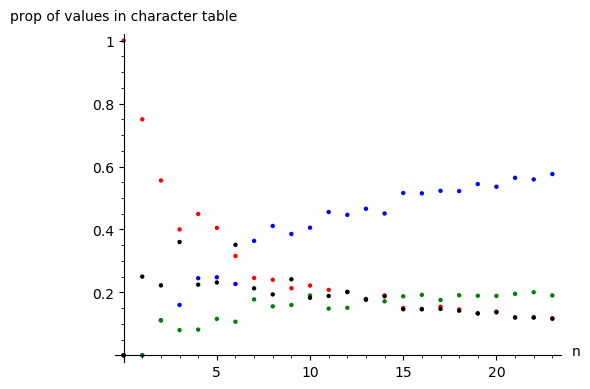

In [256]:
# calculates the residues for m = 4, up to n = 24
n = 24
m = 4

# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)])
P1 = points([(i,  proportions_list[i][m - 4][1]) for i in range(n)], color = 'red')
P2 = points([(i,  proportions_list[i][m - 4][2]) for i in range(n)], color = 'green')
P3 = points([(i,  proportions_list[i][m - 4][3]) for i in range(n)], color = 'black')
P = P0 + P1 + P2 + P3
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1)

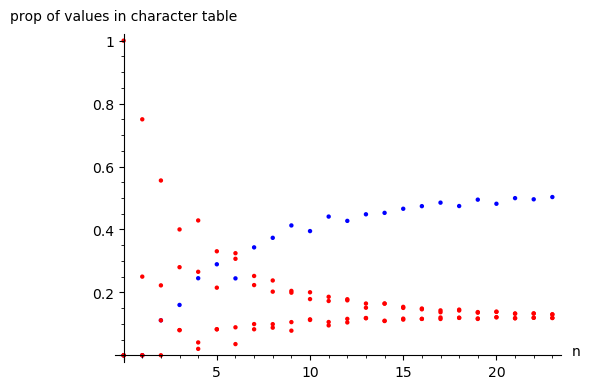

In [257]:
# calculates the residues for m = 5, up to n = 24
n = 24
m = 5
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'blue')
P = P0
# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 

for j in range(1, m) : 
  P = P + points([(i,  proportions_list[i][m - 4][j]) for i in range(n)], color = 'red')
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1)

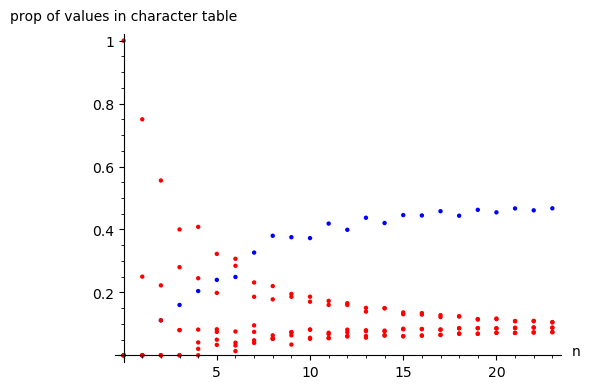

In [258]:
# calculates the residues for m = 7, up to n = 24
n = 24
m = 7
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'blue')
P = P0
# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 

for j in range(1, m) : 
  P = P + points([(i,  proportions_list[i][m - 4][j]) for i in range(n)], color = 'red')
P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1)

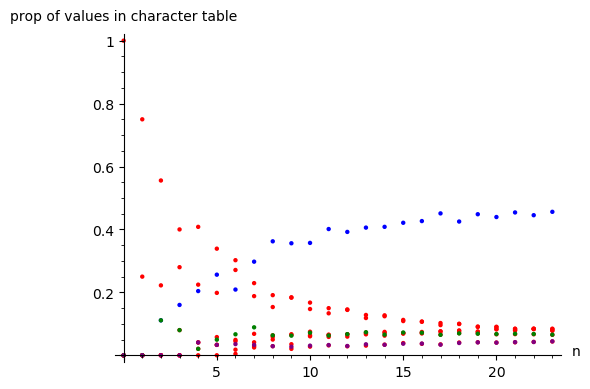

In [259]:
# calculates the residues for m = 9, up to n = 24
n = 24
m = 9
P0 = points([(i, proportions_list[i][m - 4][0]) for i in range(n)], color = 'blue')
P = P0

# Pn adds the list of tuples (i, proportion of the table that's i mod m) to the graph P 

for j in range(1, m) : 
  if j == 2 or j == 5: 
    "rip the finagling"
  else : 
    P = P + points([(i,  proportions_list[i][m - 4][j]) for i in range(n)], color = 'red')
    
# this is 3 mod 9 
P = P + points([(i,  proportions_list[i][m - 4][2]) for i in range(n)], color = 'green')

# this is 6 mod 9 
P = P + points([(i,  proportions_list[i][m - 4][5]) for i in range(n)], color = 'purple')

P.show(axes_labels = ("n", "prop of values in character table"), axes_labels_size = 1)

In [209]:
pip import dill
dill.dump_session('notebook_env.db')

ModuleNotFoundError: No module named 'dill'

In [208]:
# writes the char_table_list to a csv file 
C = char_table_list
  with open("n_symm_character_table" + ".csv", 'w') as f:
            c = csv.writer(f)
            c.writerows(C)

SyntaxError: invalid syntax (<ipython-input-260-c870fd29cace>, line 1)